# Importing the Libraries

In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [296]:
dataset = pd.read_csv('bank-additional-full.csv', sep=';', quotechar='"')

In [297]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [298]:
dataset.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [299]:
dataset.shape

(41188, 21)

#### Determining the number of missing values

In [300]:
dataset.isin(['unknown']).sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

### Separating dataset as numerical and categorical

In [301]:
y = dataset['y']

In [302]:
dataset_numerical = dataset[dataset.select_dtypes(include=['number']).columns].copy()

In [303]:
dataset_categorical = dataset[dataset.select_dtypes(include=['object']).columns].copy()
# Change the object type columns to categorical
object_columns = dataset_categorical.select_dtypes(include=['object']).columns.tolist()
for column in object_columns:
    dataset_categorical[column] = pd.Categorical(dataset_categorical[column])

In [304]:
dataset_numerical.dtypes

age                 int64
duration            int64
campaign            int64
pdays               int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [305]:
dataset_categorical.dtypes

job            category
marital        category
education      category
default        category
housing        category
loan           category
contact        category
month          category
day_of_week    category
poutcome       category
y              category
dtype: object

## Exploring the dataset

#### Exploring the numerical features

In [306]:
def visualize_features(df,column_name):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column_name, kde=True, color='skyblue')
    plt.title(f"Distribution of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [307]:
def visualize_target_feature(df_x, df_y,column_name):
    merged_df = df_x.merge(df_y, how='outer', left_index=True, right_index=True).copy()
    
    plt.figure(figsize=(8, 5))
    sns.histplot(data=merged_df, x=column_name, hue='y', multiple='stack', palette='Set2') 
    plt.title(f"Distribution of 'y' within {column_name} Groups") 
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [308]:
def visualize_outliers(df, column_name):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=column_name, color='skyblue')
    plt.title(f"Boxplot of {column_name} (with Outliers)")
    plt.xlabel(column_name)
    plt.tight_layout()
    plt.show()

In [309]:
def remove_outliers_by_quantiles(df, column_name, lower_quantile=0.01, upper_quantile=0.99):
    lower_bound = df[column_name].quantile(lower_quantile)
    upper_bound = df[column_name].quantile(upper_quantile)
    df.drop(df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)].index, inplace=True)

In [310]:
def extract_feature_by_thresholds(df,col_name,thresholds):
    df[f'{col_name}_group'] = pd.cut(df[col_name], bins=[0] + thresholds + [df[col_name].max()], labels=[f"{col_name}_{i}" for i in range(1, len(thresholds) + 2)])

In [311]:
def print_extract_feature_by_thresholds(df,col_name,thresholds):
    counts = {}
    total_samples = df[col_name].shape[0]

    for i, threshold in enumerate(thresholds):
        if i == 0:
            counts[f"<{threshold}"] = df[df[col_name] < threshold].shape[0]
        else:
            counts[f"{thresholds[i-1]}-{threshold}"] = df[(df[col_name] >= thresholds[i-1]) & (df[col_name] < threshold)].shape[0]

    # Count samples greater than the last threshold
    counts[f">{thresholds[-1]}"] = df[df[col_name] >= thresholds[-1]].shape[0]

    print(f"Number of samples in specific {col_name} groups:")
    for group, count in counts.items():
        percentage = (count / total_samples) * 100
        print(f"{group}: {count} samples, {percentage:.2f}%")

##### 1-) "Age"

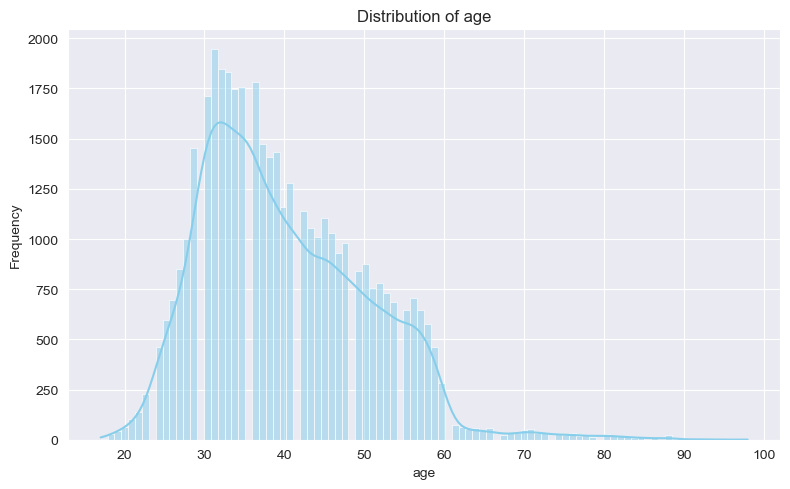

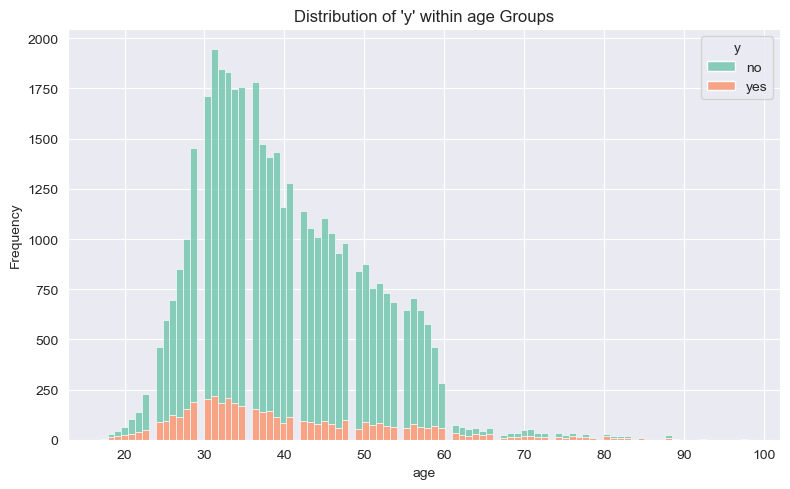

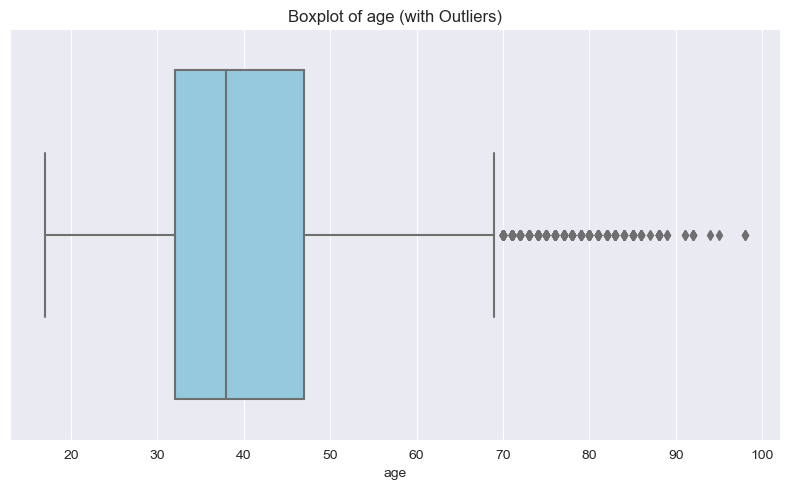

In [312]:
visualize_features(dataset_numerical,'age')
visualize_target_feature(dataset_numerical,y,'age')
visualize_outliers(dataset_numerical,'age')

In [313]:
remove_outliers_by_quantiles(dataset_numerical,'age')

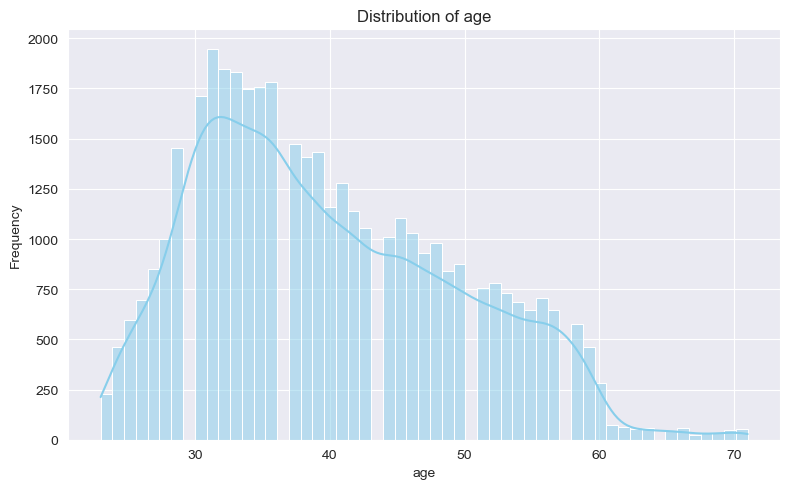

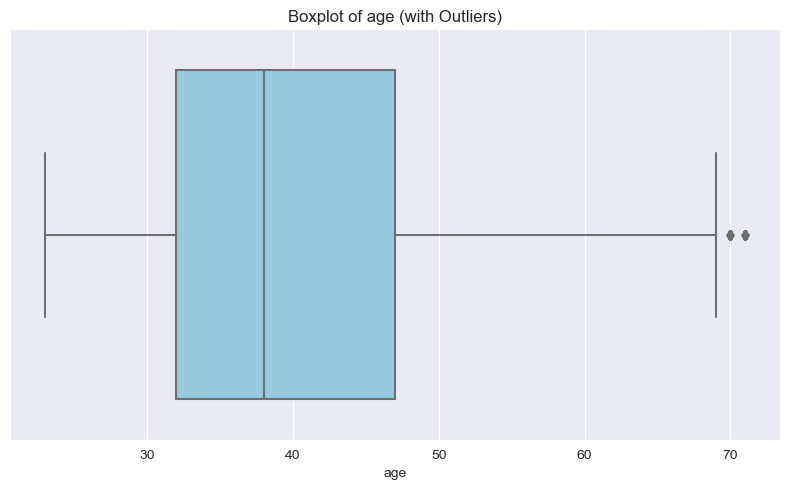

In [314]:
visualize_features(dataset_numerical,'age')
visualize_outliers(dataset_numerical,'age')

In [315]:
age_thresholds = [30,33,36,39,43,48,54]
print_extract_feature_by_thresholds(dataset_numerical,'age',age_thresholds)

Number of samples in specific age groups:
<30: 5290 samples, 13.08%
30-33: 5507 samples, 13.62%
33-36: 5337 samples, 13.20%
36-39: 4662 samples, 11.53%
39-43: 5013 samples, 12.40%
43-48: 5127 samples, 12.68%
48-54: 4959 samples, 12.26%
>54: 4545 samples, 11.24%


In [316]:
extract_feature_by_thresholds(dataset_numerical,'age',age_thresholds)

In [317]:
age_mapping = {
    'age_1': 'age_<30',
    'age_2': 'age_30-33',
    'age_3': 'age_33-36',
    'age_4': 'age_36-39',
    'age_5': 'age_39-43',
    'age_6': 'age_43-48',
    'age_7': 'age_48-54',
    'age_8': 'age_>54'
}
dataset_numerical['age_group'] = dataset_numerical['age_group'].replace(age_mapping)

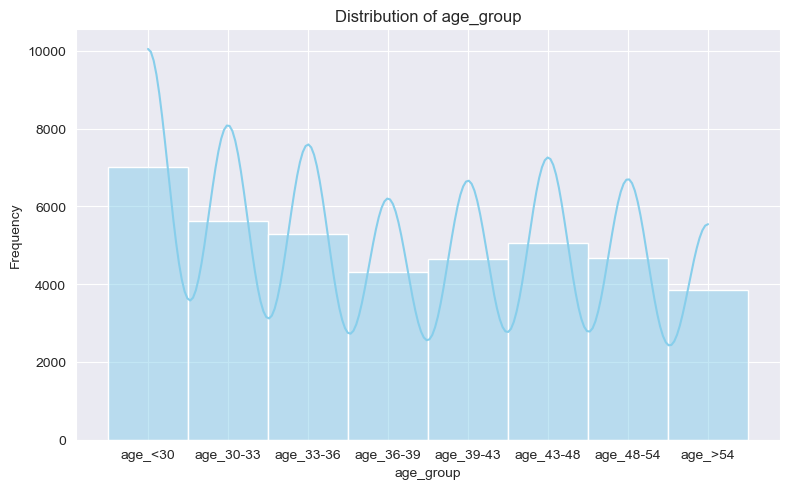

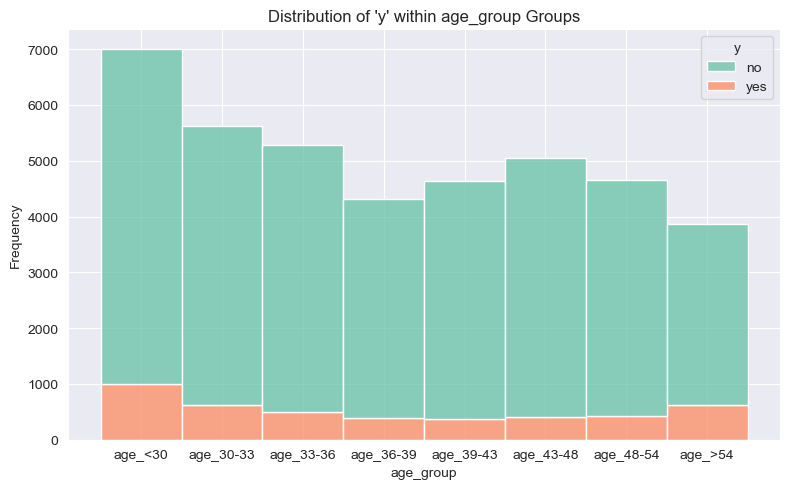

In [318]:
visualize_features(dataset_numerical,'age_group')
visualize_target_feature(dataset_numerical,y,'age_group')

##### 2-) Duration

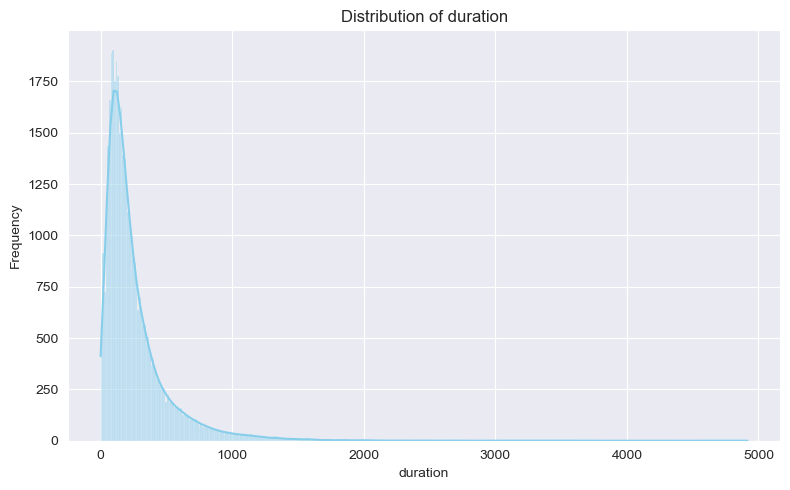

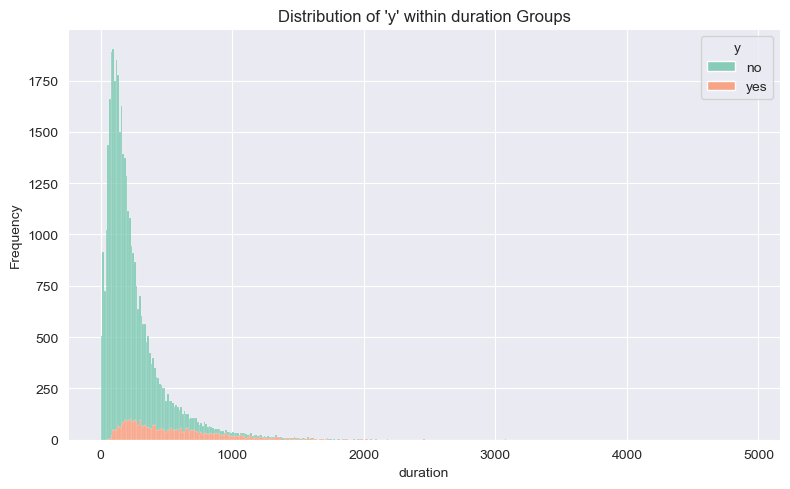

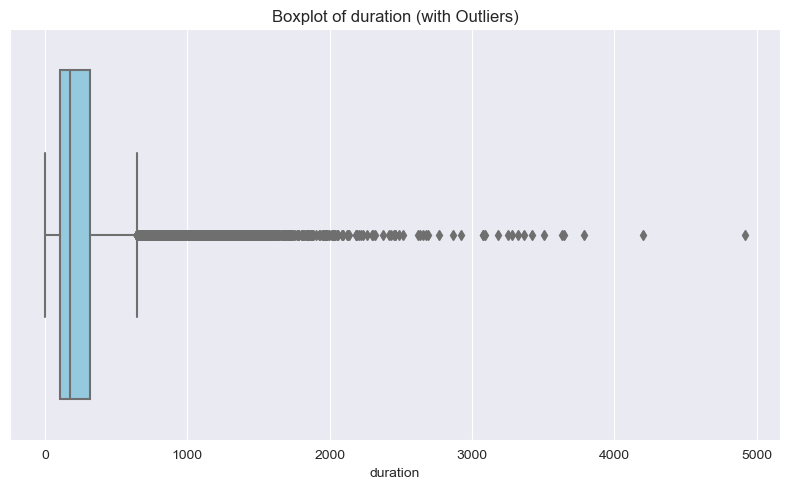

In [319]:
visualize_features(dataset_numerical,'duration')
visualize_target_feature(dataset_numerical,y,'duration')
visualize_outliers(dataset_numerical,'duration')

In [320]:
remove_outliers_by_quantiles(dataset_numerical,'duration')

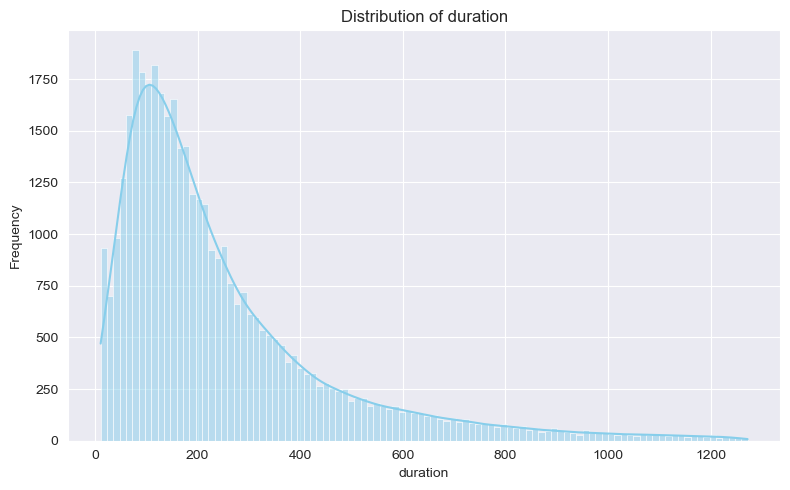

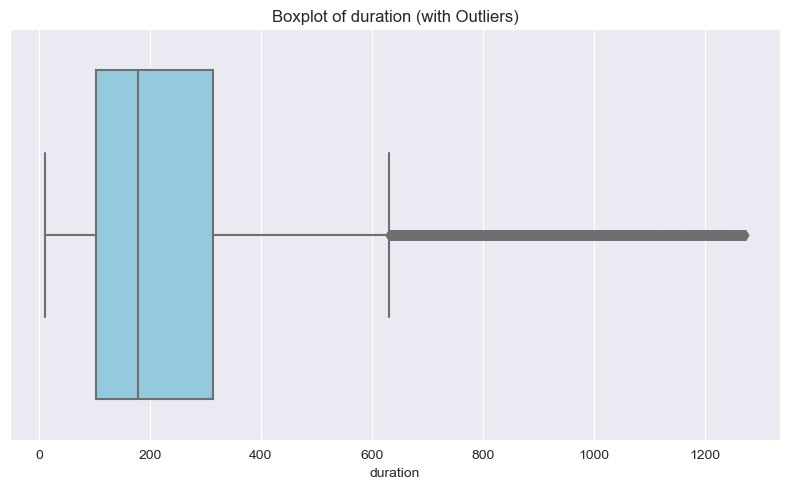

In [321]:
visualize_features(dataset_numerical,'duration')
visualize_outliers(dataset_numerical,'duration')

In [351]:
duration_threshold = [70,100,130,170,220,300,450]
print_extract_feature_by_thresholds(dataset_numerical,'duration',duration_threshold)

Number of samples in specific duration groups:
<70: 5026 samples, 12.67%
70-100: 4382 samples, 11.04%
100-130: 4304 samples, 10.85%
130-170: 5084 samples, 12.81%
170-220: 4981 samples, 12.55%
220-300: 5274 samples, 13.29%
300-450: 5204 samples, 13.12%
>450: 5423 samples, 13.67%


In [352]:
extract_feature_by_thresholds(dataset_numerical,'duration',duration_threshold)

In [357]:
age_mapping = {
    'duration_1': 'duration_<70',
    'duration_2': 'duration_70-100',
    'duration_3': 'duration_100-130',
    'duration_4': 'duration_130-170',
    'duration_5': 'duration_170-220',
    'duration_6': 'duration_220-300',
    'duration_7': 'duration_300-450',
    'duration_8': 'duration_>450'
}
dataset_numerical['duration_group'] = dataset_numerical['duration_group'].replace(age_mapping)

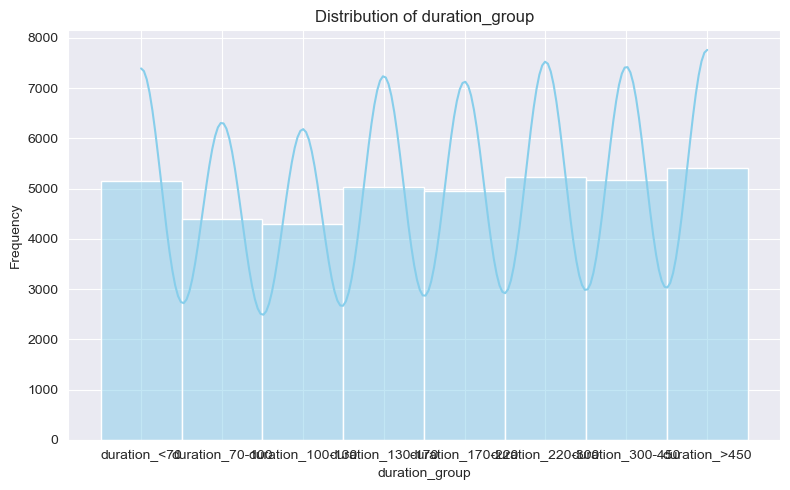

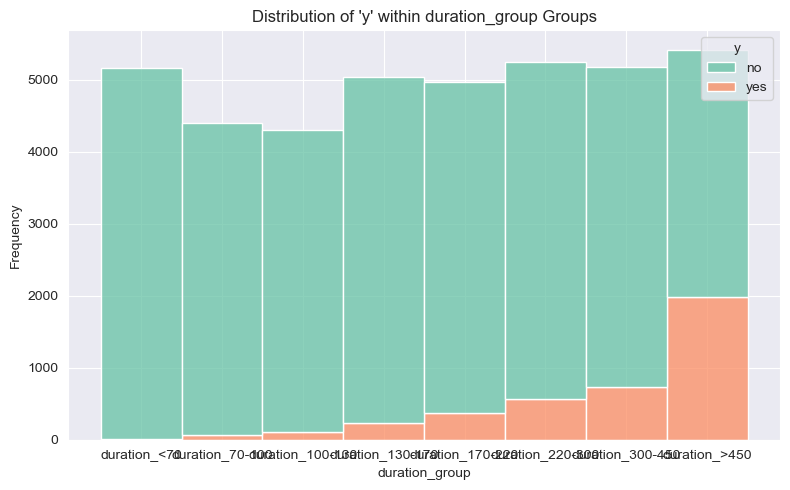

In [358]:
visualize_features(dataset_numerical,'duration_group')
visualize_target_feature(dataset_numerical,y,'duration_group')